In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Ignores any warning
warnings.filterwarnings("ignore")

In [68]:
train = pd.read_csv("/home/jay/Desktop/Dmart-Sales-Prediction/Sales Prediction Project/data/train.csv")
test = pd.read_csv("/home/jay/Desktop/Dmart-Sales-Prediction/Sales Prediction Project/data/test.csv")

In [69]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


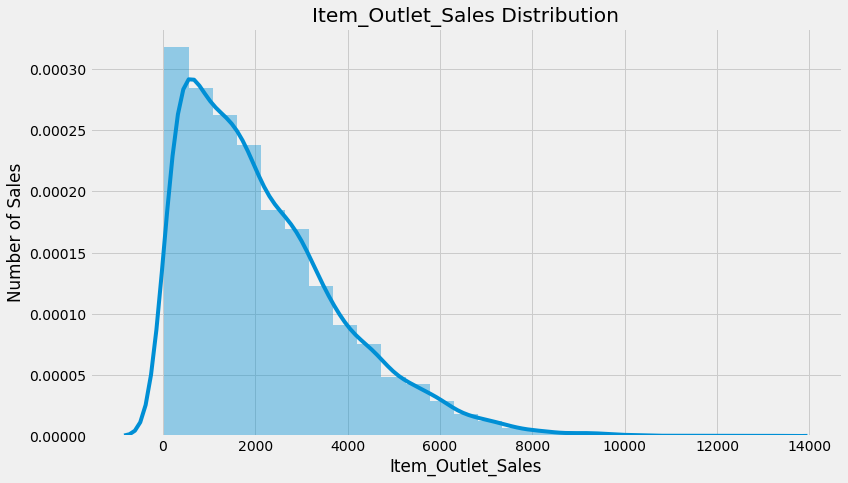

In [72]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
sns.distplot(train.Item_Outlet_Sales, bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0, 1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")
plt.show()  # Distribution of item outlet sales

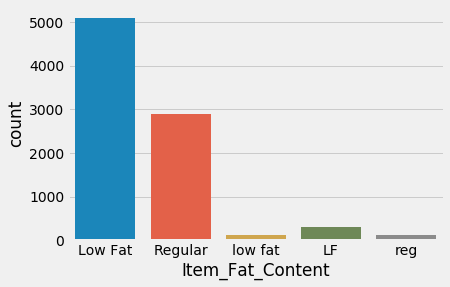

In [73]:
sns.countplot(train.Item_Fat_Content)
plt.show()  # Distribution of fat content

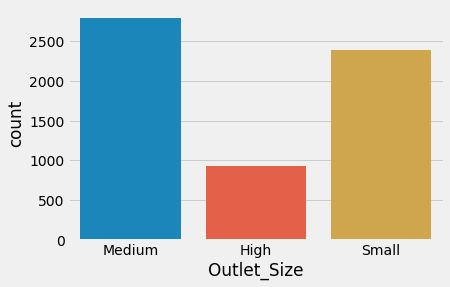

In [74]:
sns.countplot(train.Item_Type)
sns.countplot(train.Outlet_Size)
plt.show()  # Distribution of outlet size

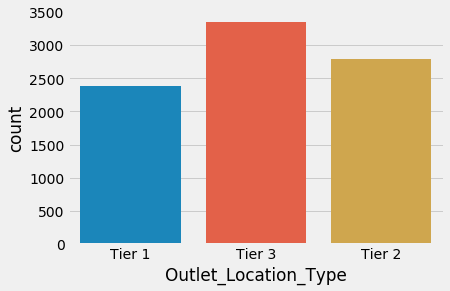

In [75]:
sns.countplot(train.Outlet_Location_Type)
plt.show()  # Distribution of outlet location type

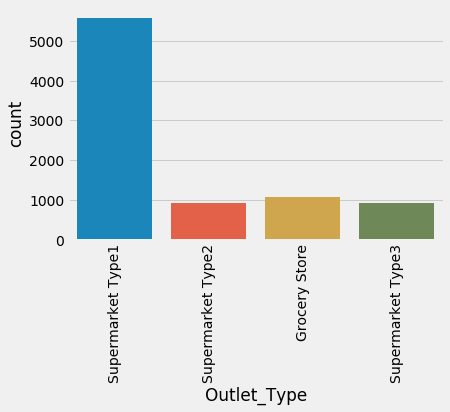

In [76]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)
plt.show()  # Distribution of outlet type

In [77]:
# Join Train and Test Dataset

# Create source column to later separate the data easily
train['source'] = 'train'
test['source'] = 'test'

In [78]:
data = pd.concat([train, test], ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [79]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')  
# Create table with identifiers and its weights and ignores the NaN values

In [80]:
def impute_weight(cols):  # Filling null values with mean
    Weight = cols[0]
    Identifier = cols[1]

    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight


In [81]:
print ('Orignal missing: %d' % sum(data['Item_Weight'].isnull()))
print (data['Item_Weight'].mean())

Orignal missing: 2439
12.792854228644991


In [82]:
data['Item_Weight'] = data[['Item_Weight', 'Item_Identifier']].apply(impute_weight, axis=1).astype(float)

print ('Final missing: %d' % sum(data['Item_Weight'].isnull()))


Final missing: 0


In [83]:
from scipy.stats import mode

# Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode())

In [84]:
def impute_size_mode(cols):  # Same as above but using mode
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

In [85]:
print ('Orignal missing: %d' % sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size', 'Outlet_Type']].apply(impute_size_mode, axis=1)
print ('Final missing: %d' % sum(data['Outlet_Size'].isnull()))

Orignal missing: 4016
Final missing: 0


In [86]:
visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [87]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

In [88]:
print ('Original zeros: %d' % sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility', 'Item_Identifier']].apply(impute_visibility_mean, axis=1).astype(float)

Original zeros: 879


In [89]:
print ('Final zeros: %d' % sum(data['Item_Visibility'] == 0))
# Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

Final zeros: 0


count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [90]:
# Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [91]:
# Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

data['Item_Type_Combined'].value_counts()

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular',
                                                             'low fat': 'Low Fat'})

In [92]:
print(data['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [93]:
# Mark non-consumables as separate category in low_fat:

data.loc[data['Item_Type_Combined'] == "Non-Consumable", 'Item_Fat_Content'] = "Non-Edible"

data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [94]:
def func(x): return x['Item_Visibility'] / visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]


data['Item_Visibility_MeanRatio'] = data.apply(func, axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [96]:
# New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [97]:
# Exporting the data back

# Drop the columns which have been converted to different types:
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [98]:
# Divide into test and train:
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

In [99]:
# Drop unnecessary columns:
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

In [100]:
# Export files as modified versions:
train.to_csv("/home/jay/Desktop/Dmart-Sales-Prediction/Sales Prediction Project/data/train_modified_data.csv", index=False)
test.to_csv("/home/jay/Desktop/Dmart-Sales-Prediction/Sales Prediction Project/data/test_modified_data.csv", index=False)

In [101]:
train_df = pd.read_csv('/home/jay/Desktop/Dmart-Sales-Prediction/Sales Prediction Project/data/train_modified_data.csv')
test_df = pd.read_csv('/home/jay/Desktop/Dmart-Sales-Prediction/Sales Prediction Project/data/test_modified_data.csv')

In [102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   int64  
 8   Outlet_Type                8523 non-null   int64  
 9   Item_Outlet_Sales          8523 non-null   float64
 10  Outlet_Years               8523 non-null   int64  
 11  Item_Type_Combined         8523 non-null   int64  
 12  Item_Visibility_MeanRatio  8523 non-null   float64
 13  Outlet                     8523 non-null   int64

In [103]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Size                5681 non-null   int64  
 7   Outlet_Location_Type       5681 non-null   int64  
 8   Outlet_Type                5681 non-null   int64  
 9   Outlet_Years               5681 non-null   int64  
 10  Item_Type_Combined         5681 non-null   int64  
 11  Item_Visibility_MeanRatio  5681 non-null   float64
 12  Outlet                     5681 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: